# Video Data load

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
batchsize = 60              # Each batch contain 60 videos.
n_exp = int(batchsize / 2)  # Number of abnormal and normal videos.
Num_abnormal = 810          # Total number of abnormal videos in Training Dataset
Num_Normal = 800            # Total number of Normal videos in Training Dataset

In [3]:
# We assume the features of abnormal videos and normal videos are located in two different folders.
Abnor_list_iter = np.random.permutation(Num_abnormal)
Abnor_list_iter = Abnor_list_iter[Num_abnormal-n_exp:]   # Indexes for randomly selected Abnormal Videos
Norm_list_iter = np.random.permutation(Num_Normal)
Norm_list_iter = Norm_list_iter[Num_Normal-n_exp:]       # Indexes for randomly selected Normal Videos

In [4]:
def listdir_nohidden(AllVideos_Path): # To ignore hidden files
    file_dir_extension = os.path.join(AllVideos_Path, '*_C.txt')
    for f in glob.glob(file_dir_extension):
        if not f.startswith('.'):
            yield os.path.basename(f)

# Data 탐구

In [5]:
file_list1 = glob.glob('E:\\anomalydetection\*\*')
file_list2 = glob.glob('E:\\anomalydetection\*\*\*')

file_list = file_list1 + file_list2

In [6]:
all_videos = [file for file in file_list if file.endswith('.mp4')]

In [7]:
len(all_videos)

1950

In [8]:
# Load train data list
f = open('E:\\anomalydetection\Anomaly_Train.txt', 'r')
l = f.read()
f.close()

In [9]:
len(l.split('\n')[:-1])

1610

In [10]:
Train_list = l.split('\n')[:-1]

In [11]:
train_file = [file.split('/')[-1] for file in Train_list]
train_file_path = [file.split('/')[0] for file in Train_list]

In [12]:
in_ind = [i for i, file in enumerate([file.split('\\')[-1] for file in all_videos]) if file in train_file]
not_in_ind = [i for i, file in enumerate([file.split('\\')[-1] for file in all_videos]) if file not in train_file]
train_file_paths = np.array(all_videos)[in_ind]
test_file_paths = np.array(all_videos)[not_in_ind]

In [13]:
train_normal_file_paths = np.array([file for file in train_file_paths if 'Normal' in file])
train_abnormal_file_paths = np.array([file for file in train_file_paths if 'Normal' not in file])

test_normal_file_paths = np.array([file for file in test_file_paths if 'Normal' in file])
test_abnormal_file_paths = np.array([file for file in test_file_paths if 'Normal' not in file])

# Video 파일 읽어보기

In [14]:
import cv2

In [22]:
capture = cv2.VideoCapture(test_abnormal_file_paths[0])

In [94]:
int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

1412

In [26]:
frames = [capture.read()[1] for i in range(
    int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))]

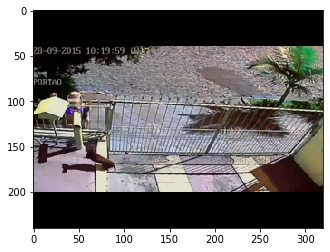

In [32]:
plt.imshow(frames[156])

In [58]:
frames[0].shape

(240, 320, 3)

In [95]:
img1 = []
for i in range(1412 // 32 + 1):
    img1.append(
        np.concatenate(
            [frame.reshape(240, 320, 3, 1) for frame in frames][i*32:(i+1)*32],
            axis=3)
    )

In [97]:
img1[-1].shape

(240, 320, 3, 4)

In [18]:
ret, frame = capture.read()

In [19]:
frame.shape

(240, 320, 3)

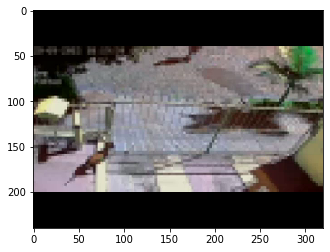

In [20]:
plt.imshow(frame)

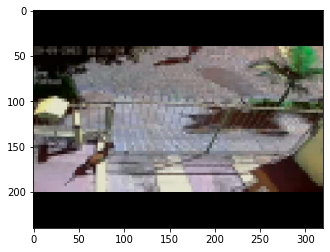

In [21]:
ret, frame = capture.read()
plt.imshow(frame)

TypeError: Image data of dtype object cannot be converted to float

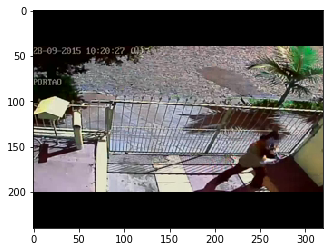

In [22]:
for i in range(10):
    ret, frame = capture.read()
    if i % 1000 == 0:
        plt.imshow(frame)

In [26]:
capture.release()

In [107]:
while True:
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open(test_abnormal_file_paths[0])

    ret, frame = capture.read()
    cv2.imshow("VideoFrame", frame)

    if cv2.waitKey(33) > 0: break

capture.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 